In [28]:
!pip install openai==0.28 #download and the necessary pakages

In [29]:
#import all the necessay libraries
import pandas as pd # Library for data handeling
import matplotlib.pyplot as plt # Handles Data visualization
import seaborn as sns
import openai # openAI library to interact with the OpenAI API

In [30]:
# Importing all the necessary libraries for eda analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
import re

In [31]:
# Reading the csv file
df = pd.read_csv("/content/drive/MyDrive/Reddit Sentiment Analysis (1).csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             400 non-null    object 
 1   subreddit      400 non-null    object 
 2   submission_id  400 non-null    object 
 3   comment_body   400 non-null    object 
 4   score          355 non-null    float64
dtypes: float64(1), object(4)
memory usage: 15.8+ KB


In [33]:
df.shape

(400, 5)

In [34]:
df.head()

,id,subreddit,submission_id,comment_body,score
0,jbnq5e9,reddevils,11nl59m,He was clearly signaling for a substitution. P...,NaN
1,jbnpoh0,reddevils,11nl59m,I'll never forget Bruno standing behind Ole wh...,NaN
2,jbnoo3x,reddevils,11nl59m,That is such a Wout goal (even though he hasn’...,NaN
3,jbnpdfj,reddevils,11nl59m,I hope Pellistri gets more game time. I think ...,NaN
4,jbnvnr2,reddevils,11nl59m,I love Bruno. \n\nGenuinely can’t believe the ...,NaN


In [35]:
df.isnull().sum()

,0
id,0
subreddit,0
submission_id,0
comment_body,0
score,45


In [36]:
df['score'].isnull()

,score
0,True
1,True
2,True
3,True
4,True
...,...
395,False
396,False
397,False
398,False


In [37]:
df.tail()

,id,subreddit,submission_id,comment_body,score
395,jcmpuum,NUFC,11u6zoq,"Anderson and Murphy ripped, Karius long flowin...",0.3
396,jcmpivf,NUFC,11u6zoq,Isak has a real look of divilment in these pho...,0.5
397,jcmtqvg,NUFC,11u6zoq,"Nice to see Gordon there despite injury, and K...",0.6
398,jcmtn8z,NUFC,11u6zoq,Karius looks even more handsome with his hair ...,0.6
399,jcogi2y,NUFC,11u6zoq,Bloody hell Anderson is a beast,0.5


In [38]:
#df['score'] = 0

In [39]:
# EDA analysis of the dataset

In [40]:
df['subreddit'].unique()

array(['reddevils', 'LiverpoolFC', 'chelseafc', 'Gunners', 'coys', 'MCFC',
       'Everton', 'NUFC'], dtype=object)

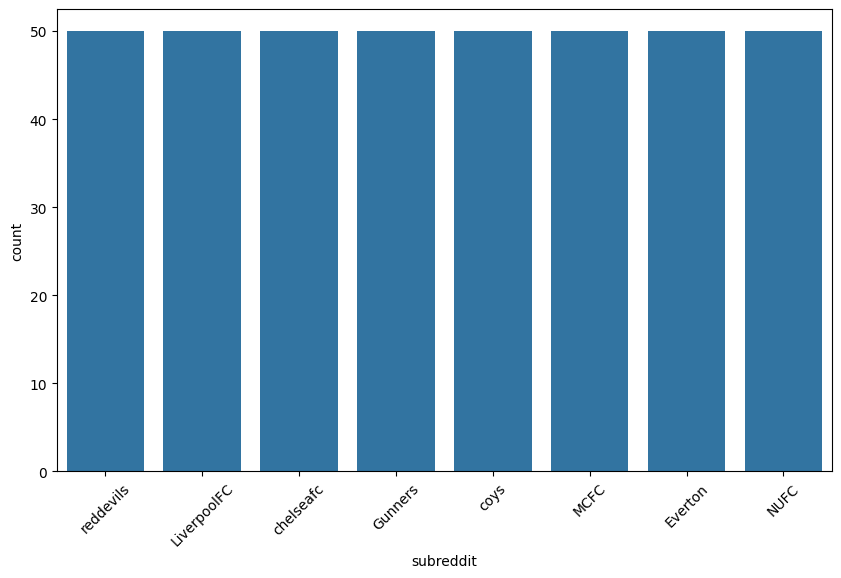

In [41]:
#Distribution of comments per subreddit
plt.figure(figsize=(10,6))
sns.countplot(x='subreddit', data=df)
plt.xticks(rotation=45)
plt.show()

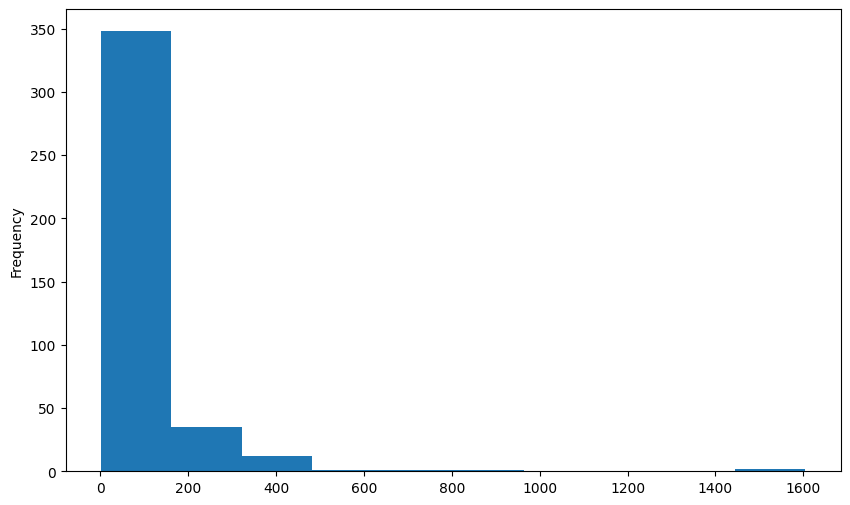

In [42]:
# Analysis of comment length
df['comment_body'].apply(len)
plt.figure(figsize=(10,6))
df['comment_body'].apply(len).plot(kind='hist')
plt.show()

In [43]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

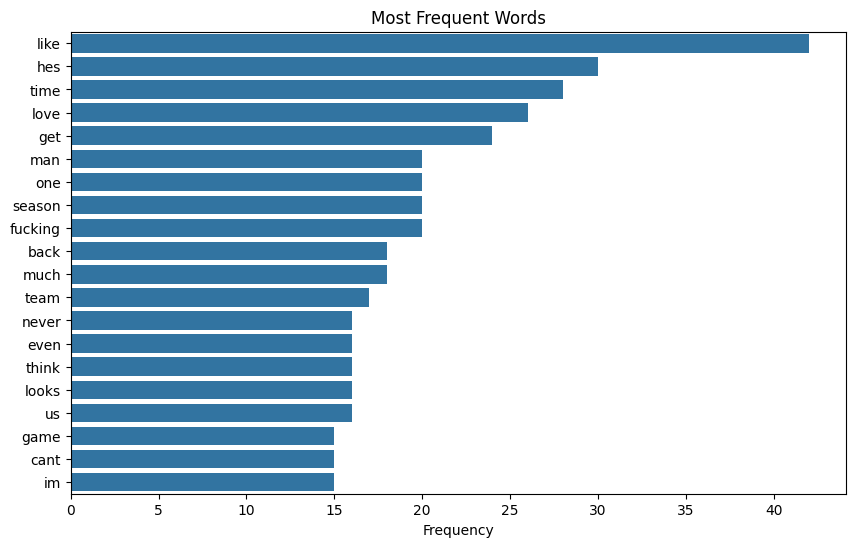

In [44]:
#  Most frequent words in the dataset
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', text.lower()))

    tokens = [word for word in tokens if word not in stop_words]#remove stopwords
    return tokens
df['clean_tokens'] = df['comment_body'].apply(clean_text)

all_words = [word for tokens in df['clean_tokens'] for word in tokens]
word_freq = Counter(all_words)

common_words = word_freq.most_common(20)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Frequent Words')
plt.xlabel('Frequency')
plt.show()

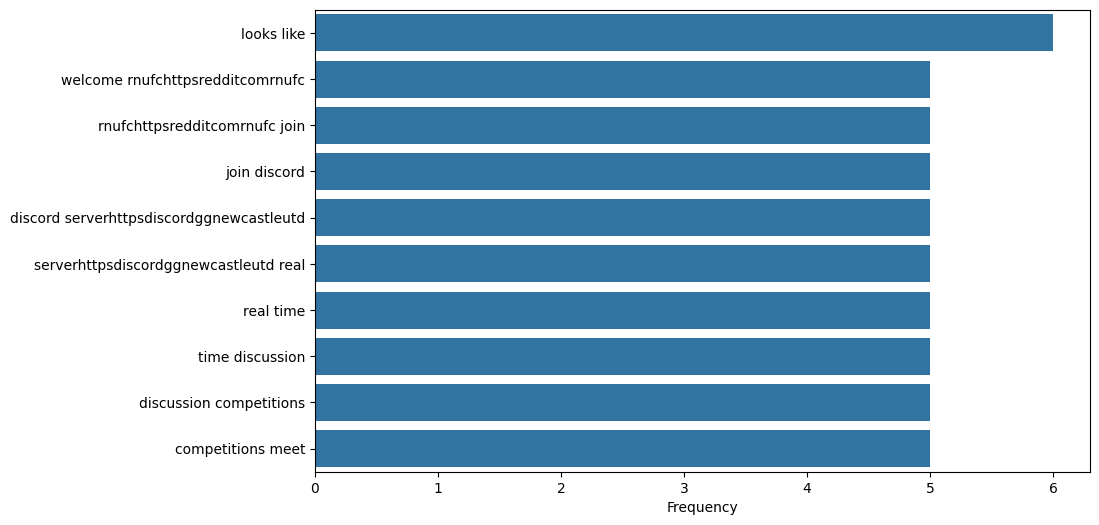

In [45]:
# Common phrases (bigrams) in the dataset
def get_bigrams(tokens):
    bigrams = ngrams(tokens, 2)
    return [' '.join(bigram) for bigram in bigrams]
df['bigrams'] = df['clean_tokens'].apply(get_bigrams)
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(10)

# Plot the most common bigrams
bigrams, bigram_counts = zip(*common_bigrams)
plt.figure(figsize=(10,6))
sns.barplot(x=list(bigram_counts), y=list(bigrams))
plt.xlabel('Frequency')
plt.show()

In [46]:
df.drop(columns=['clean_tokens', 'bigrams'], inplace=True)

In [47]:
df.head()

,id,subreddit,submission_id,comment_body,score
0,jbnq5e9,reddevils,11nl59m,He was clearly signaling for a substitution. P...,NaN
1,jbnpoh0,reddevils,11nl59m,I'll never forget Bruno standing behind Ole wh...,NaN
2,jbnoo3x,reddevils,11nl59m,That is such a Wout goal (even though he hasn’...,NaN
3,jbnpdfj,reddevils,11nl59m,I hope Pellistri gets more game time. I think ...,NaN
4,jbnvnr2,reddevils,11nl59m,I love Bruno. \n\nGenuinely can’t believe the ...,NaN


In [48]:
openai.api_key="sk-"  # insert your api key here

In [49]:
# Function to get sentiment Score of comments
def sentiment_analysis(comment):
    try:
        prompt = f"""
        You are a sentiment analysis bot. A comment will be passed to you, and your task is to carefully evaluate its sentiment.
        Please provide a sentiment score on a continuous scale of -1 to 1, where:
        -1 is for the most negative sentiment,
         0 is for neutral sentiment, and
         1 is for the most positive sentiment.
        ONLY respond with the numerical score.
        Comment: {comment}
        """

        # Call to the API
        response = openai.Completion.create(
            model="gpt-3.5-turbo",  # Using GPT-3.5-turbo for sentiment analysis
            prompt=prompt,
            max_tokens=3,
            temperature=0
        )
        response_text = response.choices[0].text.strip()
        score = float(response_text)

        # Return the final score
        return score
    except Exception as e:
        print(f"Error occurred: {e}")
        return None


In [ ]:
# Apply the sentiment analysis function to each comment in dataset
df['score'] = df['comment_body'].apply(sentiment_analysis)

Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error occurred: Incorrect API key provided: sk-. You can find your API key at https://platform.openai.com/account/api-keys.
Error oc

In [ ]:
df.loc[df['score'].isnull(), 'score'] = df.loc[df['score'].isnull(), 'comment_body'].apply(sentiment_analysis)

In [ ]:
df.head()

In [ ]:
# Save the dataset with updated sentiment scores into a new CSV file
df.to_csv("reddit_sentiment_analysis_scores_updated.csv", index=False)